# Regression Analysis of Land - Price Correlation of Commercial Real Estate in Ho Chi Minh City

In [18]:
import random as rnd
import math as mth
import statistics as sts
import numpy as np
import scipy as sci
import scipy.linalg as la
import scipy.stats as st
import scipy.special as spp
import matplotlib.pyplot as plt
import sympy as sy
import stemgraphic as stm
import itertools as it
import operator as op
import seaborn as sns
import math
import pandas as pd
import sqlite3
import pandas as pd
import numpy as np

In [19]:
def filter_sql(data, target_province, target_land_use):
    """
    Input: data - pd frame
    target_province - string name

    Output:
    result - a pd frame
    """
    # Create in-memory SQLite DB
    conn = sqlite3.connect(':memory:')
    data.to_sql('data_table', conn, index=False, if_exists='replace')

    # Parameterized query — safer and correct
    query = """
    SELECT *
    FROM data_table AS d
    WHERE d.Province = ?
    AND d.Land_Use = ?
    """

    # Pass the value as a parameter tuple
    result = pd.read_sql_query(query, conn, params=(target_province,target_land_use))
    conn.close()

     # Clean and convert Land_Area and Land_Value (remove commas, convert to int)
    result['Land_Area'] = result['Land_Area'].str.replace(',', '', regex=True)
    result['Land_Value'] = result['Land_Value'].str.replace(',', '', regex=True)

    result['Land_Area'] = pd.to_numeric(result['Land_Area'], errors='coerce')
    result['Land_Value'] = pd.to_numeric(result['Land_Value'], errors='coerce')

    # Clean FSA, convert to numeric (float to allow NaNs)
    result['FSA'] = result['FSA'].str.replace(',', '', regex=True)
    result['FSA'] = pd.to_numeric(result['FSA'], errors='coerce')

    # Clean and convert Longtitude and Latitude (remove commas, convert to numeric)
    result['Longitude'] = pd.to_numeric(result['Longitude'], errors='coerce')
    result['Latitude'] = pd.to_numeric(result['Latitude'], errors='coerce')

    # Compute mean ignoring NaNs and fill NaNs in FSA
    mean_fsa = result['FSA'].mean()
    result['FSA'] = result['FSA'].fillna(mean_fsa)

    # DROPNA any remaining rows with NaNs in important columns
    result = result.dropna(subset=['Land_Area', 'Land_Value', 'FSA','Province', 'Land_Use','Latitude','Longitude' ])

    # DROP uneccesary features
    # result = result.drop('Land_Use', axis=1)

    return result

In [20]:
# load data
df = pd.read_csv('Price_Land_Stat_2.csv', encoding='latin1')

#filtered data
filtered_df = filter_sql(df, "Ho Chi Minh", " Commercial ")

#filtered_df = filtered_df[ filtered_df['Land_Area'] < 80000]

#filtered_df = filtered_df[ filtered_df['Land_Value'] < 100000000]

Land_Area = filtered_df['Land_Area'].values

Land_Value = filtered_df['Land_Value'].values

Land_Value_Mean = np.mean(Land_Value)

FSA = filtered_df['FSA'].values

print(Land_Area.size, Land_Value.size, FSA.size)
print(Land_Value_Mean)
print(filtered_df)

363 363 363
33970943.02479339
     Land_Area   Land_Value     Province       FSA      Land_Use   Latitude  \
0       2690.0   53800000.0  Ho Chi Minh   26900.0   Commercial   10.784913   
1       1275.0   30042918.0  Ho Chi Minh   10047.0   Commercial   10.783963   
2       2068.0   49356223.0  Ho Chi Minh   24815.0   Commercial   10.777516   
3       3323.0   57939914.0  Ho Chi Minh   21932.0   Commercial   10.785346   
4        438.0    6300000.0  Ho Chi Minh    2452.0   Commercial   10.781713   
..         ...          ...          ...       ...           ...        ...   
401    16048.0   28000000.0  Ho Chi Minh   96421.0   Commercial   10.784574   
402     4300.0   11700000.0  Ho Chi Minh   23650.0   Commercial   10.798987   
403    31752.0  108900000.0  Ho Chi Minh  425714.0   Commercial   10.787375   
404    21086.0   14900000.0  Ho Chi Minh   46487.0   Commercial   10.783471   
408     3232.0    7345800.0  Ho Chi Minh   16324.0   Commercial   10.807652   

      Longitude  
0  

# CORRELATION HEAT MAP

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Land_Area   324 non-null    float64
 1   Land_Value  324 non-null    float64
 2   FSA         324 non-null    float64
 3   Latitude    324 non-null    float64
 4   Longitude   324 non-null    float64
dtypes: float64(5)
memory usage: 15.2 KB


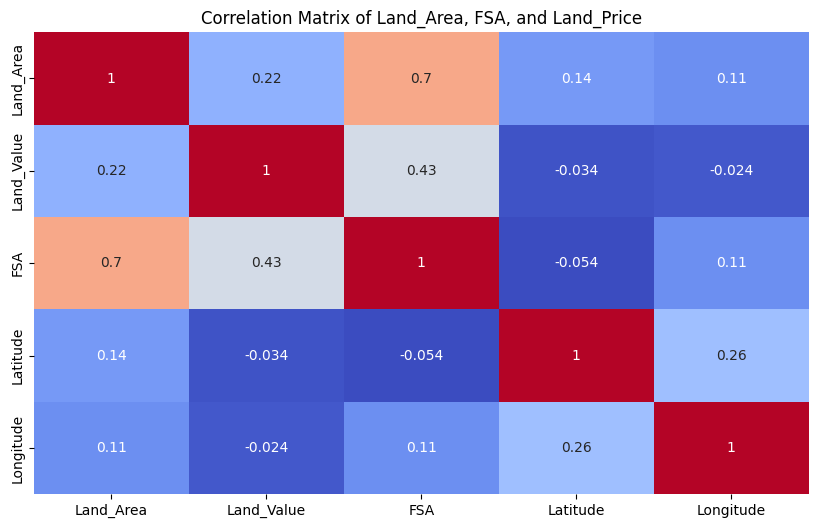

In [21]:
filtered_df = filtered_df.drop('Province', axis=1)
filtered_df = filtered_df.drop('Land_Use', axis=1)

#filtered_df = filtered_df[ filtered_df['Land_Area'] < 20000]

#filtered_df = filtered_df[ filtered_df['Land_Value'] < 60000000]

# Example: remove outliers from 'Land_Value'
Q1 = filtered_df['Land_Area'].quantile(0.25)
Q3 = filtered_df['Land_Area'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

filtered_df = filtered_df[(filtered_df['Land_Area'] >= lower) & (filtered_df['Land_Area'] <= upper)]

filtered_df .head()
filtered_df .info()
filtered_df .corr() 

plt.figure(figsize=(10, 6))
sns.heatmap(cbar=False,annot=True,data=filtered_df .corr(),cmap='coolwarm')
plt.title('Correlation Matrix of Land_Area, FSA, and Land_Price')
plt.show()

# LINEAR REGRESSION OF LAND_AREA VERSUS LAND_PRICE

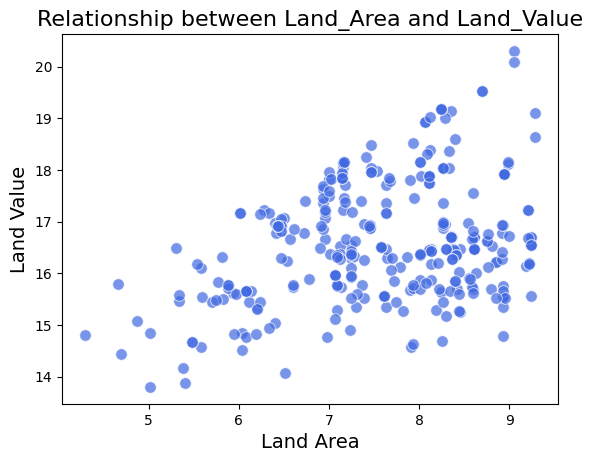

     Land_Area  Land_Value      FSA   Latitude   Longitude
0       2690.0  53800000.0  26900.0  10.784913  106.699508
1       1275.0  30042918.0  10047.0  10.783963  106.700144
2       2068.0  49356223.0  24815.0  10.777516  106.705740
3       3323.0  57939914.0  21932.0  10.785346  106.690234
4        438.0   6300000.0   2452.0  10.781713  106.690266
..         ...         ...      ...        ...         ...
387     4002.0  14163090.0  28014.0  10.746667  106.699885
392     4300.0  11700000.0  23650.0  10.798987  106.753750
394     1168.0   8600000.0  13803.0  10.797047  106.703371
402     4300.0  11700000.0  23650.0  10.798987  106.753750
408     3232.0   7345800.0  16324.0  10.807652  106.667974

[324 rows x 5 columns]


In [22]:

# Draw scatter plot using
Land_Area = filtered_df['Land_Area'].values

Land_Value = filtered_df['Land_Value'].values

FSA = filtered_df['FSA'].values

X_log = np.log(Land_Area + 1)
Y_log = np.log(Land_Value + 1)
FSA_log = np.log(FSA + 1)

sns.scatterplot(x=X_log, y=Y_log, color='royalblue', s=70, alpha=0.7)
plt.title('Relationship between Land_Area and Land_Value', fontsize=16)
plt.xlabel('Land Area' , fontsize=14)
plt.ylabel('Land Value' , fontsize=14)
plt.show()
print(filtered_df)


In [23]:
Land_Area = X_log
Land_Value = Y_log
FSA = FSA_log
Land_Value_Mean = np.mean(Land_Value)

#construct regression linear system
A = [[ area, 1] for area in Land_Area]

#coef
coef, *_ = la.lstsq(A, Y_log)

print("Coef 0:", coef[0])
print("Coef 1:", coef[1])

Coef 0: 0.3371622593773719
Coef 1: 14.0472113865593


In [24]:
# Calculate predicted y values
y_pred = [coef[0] * area + coef[1] for area in Land_Area]

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - Land_Value_Mean) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((Land_Value - Land_Value_Mean) ** 2)

r2 = ss_reg / ss_total 

print(f"R-squared: {r2}")

R-squared: 0.10256797220742561


Approximately 10% of the variation in the land value is explained by this regression data.

# QUADRATIC REGRESSION OF LAND_AREA VERSUS LAND_PRICE

In [25]:
#construct regression linear system
A = [[ area**2 , area, 1] for area in Land_Area]

#coef
coef, *_ = la.lstsq(A, Land_Value)

print("Coef 0:", coef[0])
print("Coef 1:", coef[1])
print("Coef 2:", coef[2])

Coef 0: -0.19532611995803423
Coef 1: 3.1910686721807715
Coef 2: 3.8570081390271893


In [26]:
# Calculate predicted y values
y_pred = [coef[0] * area**2 + coef[1] * area + coef[2] for area in Land_Area]

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - Land_Value_Mean) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((Land_Value - Land_Value_Mean) ** 2)

r2 = ss_reg / ss_total 
print(f"R-squared: {r2}")

R-squared: 0.15586650911509328


Approximately 16% of the variation in the land value is explained by this quadratic regression data.

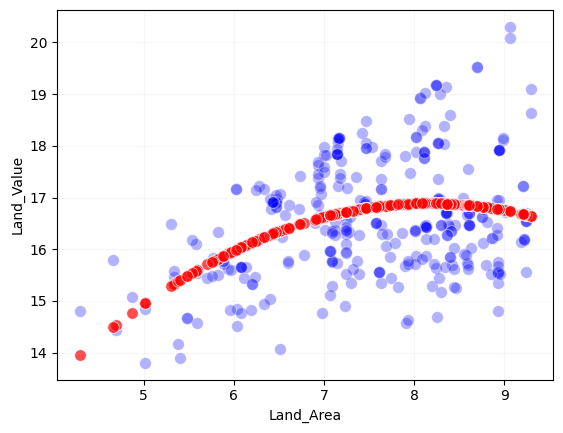

In [27]:
sns.scatterplot(x=Land_Area, y=Land_Value, color='blue', s=70, alpha=0.3)
plt.xlabel('Land_Area')
plt.ylabel('Land_Value')
plt.grid(alpha=0.1)
sns.scatterplot(x=Land_Area, y=y_pred, color='red', s=70, alpha=0.7)
plt.show()

# QUADRATIC REGRESSION OF FSA VERSUS LAND_PRICE

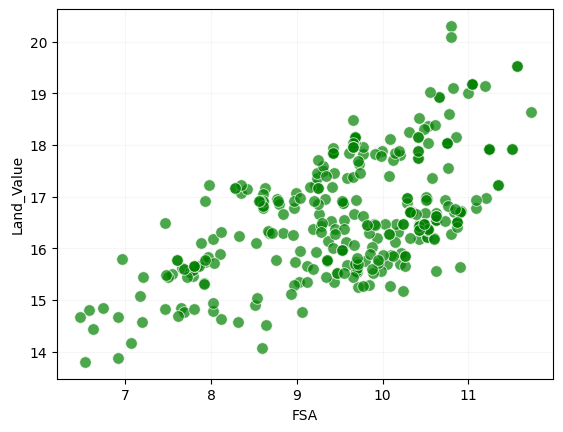

In [28]:
# draw scatter plot
sns.scatterplot(x=FSA, y=Land_Value, color='green', s=70, alpha=0.7)
plt.xlabel('FSA')
plt.ylabel('Land_Value')
plt.grid(alpha=0.1)
plt.show()


In [29]:
#construct regression linear system
A = [[ f**2 , f, 1] for f in FSA]

#coef
coef, *_ = la.lstsq(A, Land_Value)

print("Coef 0:", coef[0])
print("Coef 1:", coef[1])
print("Coef 2:", coef[2])

Coef 0: -0.0012697415459614334
Coef 1: 0.6017583436340455
Coef 2: 10.969665885583282


In [30]:
# Calculate predicted y values
y_pred = [coef[0] * (f**2) + coef[1] * f + coef[2] for f in FSA]

y = np.array(y_pred)

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - Land_Value_Mean) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((Land_Value - Land_Value_Mean) ** 2)

r2 = ss_reg / ss_total 
print(f"R-squared: {r2}")
print(FSA.size, y.size)

R-squared: 0.3226841677317373
324 324


Approximately 32% of the variation in the land price is explained by the regression data.


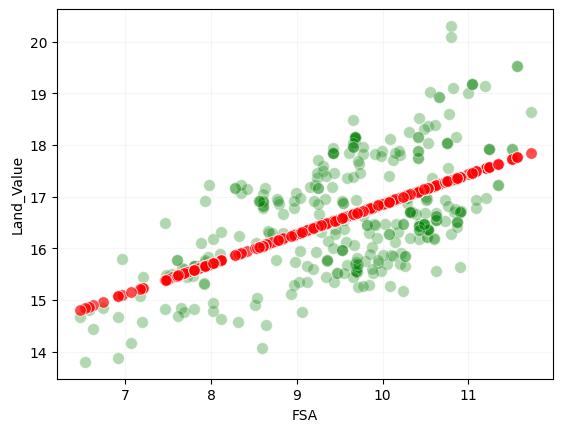

In [31]:
sns.scatterplot(x=FSA, y=Land_Value, color='green', s=70, alpha=0.3)
plt.xlabel('FSA')
plt.ylabel('Land_Value')
plt.grid(alpha=0.1)
sns.scatterplot(x=FSA, y=y_pred, color='red', s=70, alpha=0.7)
plt.show()


# MACHINE LEARNING ALGORITHMS

# RANDOM FOREST

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# load data
df = pd.read_csv('Price_Land_Stat_2.csv', encoding='latin1')

#filtered data
filtered_df = filter_sql(df, "Ho Chi Minh", " Commercial ")

# --------------------------
# Prepare features and target
# --------------------------
X = filtered_df[['Land_Area', 'FSA', 'Latitude', 'Longitude']]
y = filtered_df['Land_Value']

# --------------------------
# Train/test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------------------------
# Fit Random Forest
# --------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# --------------------------
# Predict and evaluate
# --------------------------
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:,.2f}")

# Calculate R^2
r2 = r2_score(y_test, y_pred)
print(f"Test R^2: {r2:.4f}")

# --------------------------
# Example prediction
# --------------------------
new_data = pd.DataFrame({'Land_Area': [1275], 'FSA': [10000], 'Latitude':[10.785], 'Longitude': [106.7]})
print(f"Predicted Land Value: {rf.predict(new_data)[0]:,.2f}")

Test MSE: 995,879,519,927,263.12
Test R^2: 0.8064
Predicted Land Value: 30,499,107.77


****************
Approximately 81% of the variation in the land price is explained by the ran dom forest regression data.
****************

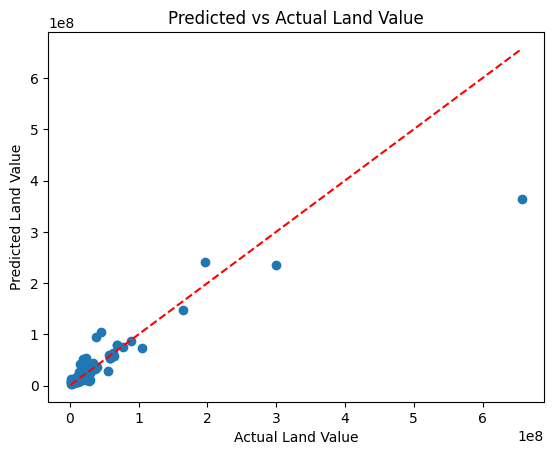

In [47]:
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Land Value')
plt.ylabel('Predicted Land Value')
plt.title('Predicted vs Actual Land Value')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.show()


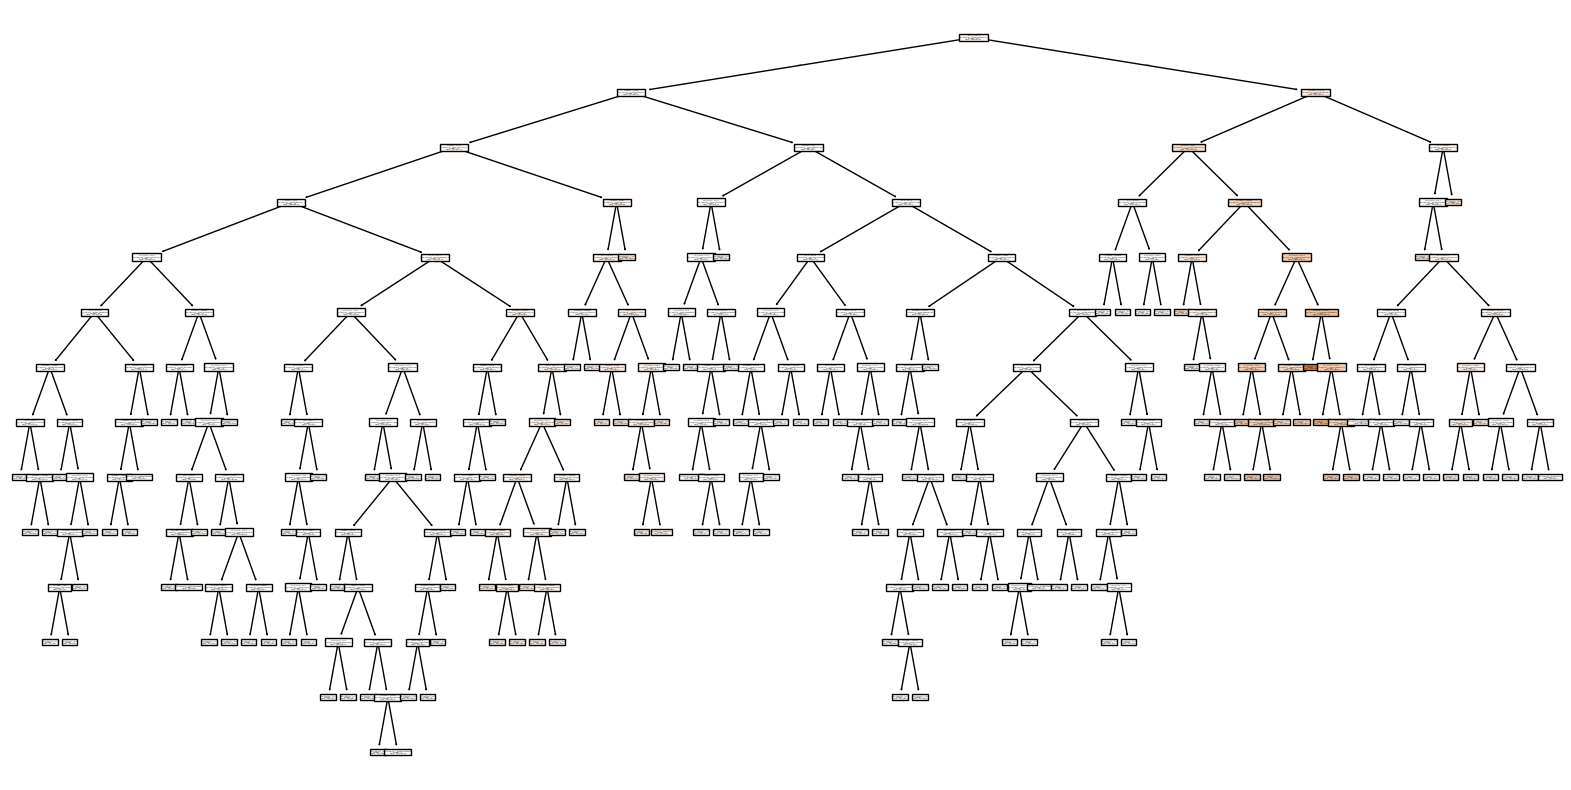

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained RandomForestRegressor
# Plot the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], filled=True, feature_names=['Land_Area', 'FSA', 'Latitude', 'Longitude'])
plt.show()
